# "Covid Tracking Starter Test"
> "Notebook to get started"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Ashutosh Sanzgiri
- categories: [covid]

In [ ]:
#hide
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
#hide
df = pd.read_csv('http://covidtracking.com/api/states/daily.csv')
states = df.state.unique()

dfk = pd.DataFrame()
for s in states:
    dfs = df[df.state==s].copy()
    dfs['tested'] = dfs['positive'] + dfs['negative']
    dfs['daily_positive_increase'] = dfs['positive'].diff(periods=-1)
    dfs['daily_death_increase'] = dfs['death'].diff(periods=-1)
    dfs['daily_tested_increase'] = dfs['tested'].diff(periods=-1)
    dfk = dfk.append(dfs)
    
dfk = dfk.fillna(0)
df_la = dfk[dfk.state=="LA"]

In [42]:
#hide_input
df_la.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,tested,daily_positive_increase,daily_death_increase,daily_tested_increase
20,20200407,LA,16284.0,58371.0,0.0,1996.0,0.0,0.0,0.0,519.0,...,22,70.0,0.0,4072.0,1417.0,5489.0,74655.0,1417.0,70.0,5489.0
76,20200406,LA,14867.0,54299.0,0.0,1981.0,0.0,0.0,0.0,552.0,...,22,35.0,0.0,6984.0,1857.0,8841.0,69166.0,1857.0,35.0,8841.0
132,20200405,LA,13010.0,47315.0,0.0,1803.0,0.0,0.0,0.0,561.0,...,22,68.0,0.0,1313.0,514.0,1827.0,60325.0,514.0,68.0,1827.0
188,20200404,LA,12496.0,46002.0,0.0,1726.0,0.0,0.0,0.0,571.0,...,22,39.0,0.0,2654.0,2199.0,4853.0,58498.0,2199.0,39.0,4853.0
244,20200403,LA,10297.0,43348.0,0.0,1707.0,0.0,0.0,0.0,535.0,...,22,60.0,0.0,1412.0,1147.0,2559.0,53645.0,1147.0,60.0,2559.0


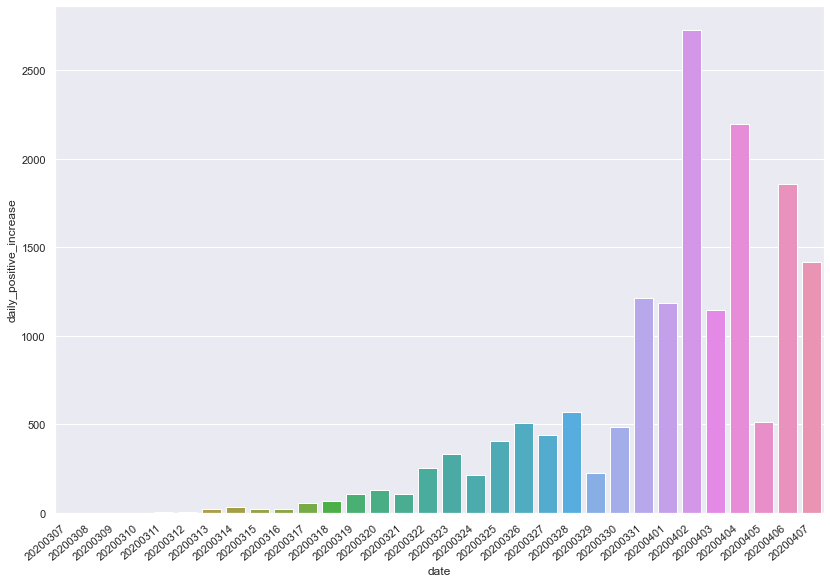

In [43]:
#hide_input
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='date', y= 'daily_positive_increase', data=df_la)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [9]:
#hide
dfk[dfk.state=="OR"].iloc[0]

date                                                        20200407
state                                                             OR
positive                                                        1132
negative                                                       20669
pending                                                            0
hospitalizedCurrently                                              0
hospitalizedCumulative                                           404
inIcuCurrently                                                     0
inIcuCumulative                                                    0
onVentilatorCurrently                                              0
onVentilatorCumulative                                            82
recovered                                                          0
hash                        b5041678cb0e10ca165d5b31647d4d51d51f4276
dateChecked                                     2020-04-07T20:00:00Z
death                             

In [20]:
#collapse-hide
import pandas as pd
import datetime
base_url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"
yesterday = f"{datetime.datetime.now() - datetime.timedelta(days=1):%m-%d-%Y}"
full_url = f"{base_url}{yesterday}.csv"
df = pd.read_csv(full_url)

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-07-2020.csv


In [21]:
#hide_input
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-07 23:04:49,34.223334,-82.461707,5,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-07 23:04:49,30.295065,-92.414197,82,2,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-07 23:04:49,37.767072,-75.632346,11,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-07 23:04:49,43.452658,-116.241552,419,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-07 23:04:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [24]:
df[df.Province_State=="Oregon"]['Confirmed'].sum()

1132

In [25]:
#hide
!pip install seaborn

     |████████████████████████████████| 225kB 897kB/s eta 0:00:01
     |████████████████████████████████| 28.4MB 3.9MB/s eta 0:00:01
     |████████████████████████████████| 12.5MB 3.6MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
     |████████████████████████████████| 61kB 4.4MB/s eta 0:00:011
You should consider upgrading via the 'pip install --upgrade pip' command.


In [140]:
import pandas as pd
import datetime
base_url="https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(base_url)

In [129]:
df = df.drop(['Lat', 'Long'], axis=1)

In [130]:
ncountries = sorted(df['Country/Region'].unique().tolist())

In [112]:
#ncountries

In [113]:
dfa = pd.DataFrame()
for i, country in enumerate(ncountries):
    dfc = df[df['Country/Region'] == country].copy()
    if len(dfc) > 1:
        dfc = dfc.drop(['Province/State'], axis=1).groupby('Country/Region').sum().reset_index()
    else:
        dfc = dfc.drop(['Province/State'], axis=1)
    dfc2 = dfc.melt(id_vars=["Country/Region"], 
                        var_name="Date",
                        value_name="cases")
    dfc2 = dfc2.rename({'Country/Region': 'country'}, axis=1)
    dfa = dfa.append(dfc2)

In [118]:
dfa[dfa.country=="France"].tail(20)

,country,Date,cases
64,France,3/26/20,29551
65,France,3/27/20,33402
66,France,3/28/20,38105
67,France,3/29/20,40708
68,France,3/30/20,45170
69,France,3/31/20,52827
70,France,4/1/20,57749
71,France,4/2/20,59929
72,France,4/3/20,65202
73,France,4/4/20,90848


In [114]:
dfa.country.nunique()

185

In [119]:
df = df.drop(['Province/State'], axis=1).groupby('Country/Region').sum().reset_index()

In [120]:
df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,349,367,423,444,484,521,555,607,665,714
1,Albania,0,0,0,0,0,0,0,0,0,...,361,377,383,400,409,416,433,446,467,475
2,Algeria,0,0,0,0,0,0,0,0,0,...,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070
3,Andorra,0,0,0,0,0,0,0,0,0,...,501,525,545,564,583,601,601,638,646,659
4,Angola,0,0,0,0,0,0,0,0,0,...,14,16,17,19,19,19,19,19,19,19


In [125]:
df3 = df.T

In [126]:
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,181,182,183,184
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


In [121]:
df2 = df.melt(id_vars=["Country/Region"], 
        var_name="Date",
        value_name="cases")
df2 = df2.rename({'Country/Region': 'country'}, axis=1)

In [124]:
df2[df2.country=="China"]

,country,Date,cases
36,China,1/22/20,548
221,China,1/23/20,643
406,China,1/24/20,920
591,China,1/25/20,1406
776,China,1/26/20,2075
...,...,...,...
14651,China,4/10/20,82941
14836,China,4/11/20,83014
15021,China,4/12/20,83134
15206,China,4/13/20,83213


In [6]:
import pandas as pd
url="https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(url)

In [7]:
#df = df.drop(['Lat', 'Long'], axis=1)
ncountries = df['Country/Region'].unique().tolist()

In [8]:
dfb = pd.DataFrame()
for i, country in enumerate(ncountries):
    dfc = df[df['Country/Region'] == country].copy()
    if len(dfc) > 1:
        dfc = dfc.drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum().reset_index()
    else:
        dfc = dfc.drop(['Province/State', 'Lat', 'Long'], axis=1)
    dfc = dfc.rename({'Country/Region': 'country', 'Date': 'date'}, axis=1)
    dfc = dfc.T
    #dfc['date'] = pd.to_datetime(dfc['date'])
    dfb = dfb.append(dfc)

In [10]:
dfc = df[df['Country/Region'] == "China"].copy()
if len(dfc) > 1:
    dfc = dfc.drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum().reset_index()
else:
    dfc = dfc.drop(['Province/State', 'Lat', 'Long'], axis=1)
dfc = dfc.rename({'Country/Region': 'country', 'Date': 'date'}, axis=1)
dfc = dfc.T

In [11]:
dfc.head()

,0
country,China
1/22/20,548
1/23/20,643
1/24/20,920
1/25/20,1406
